<a href="https://colab.research.google.com/github/allycehtta2027/CursoPython/blob/main/redesneuraissenai1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Precisamos verificar a abertura da boca, porque quase ninguém dorme sorrindo ou gargalhando. 2.Geralmente, as pessoas dormem com o rosto relaxado. 3.Agora fecharemos a janela de vídeo e calcularemos a abertura da boca. 4.Para isso, utilizamos os pontos da boca mostrou aberto - ao abrir a boca, mostrou fechado - ao fechar a boca, tocou alarme - ao abrir a boca, inserir mudanças de core s e alinhamentos mostrar o Mar e com códigos para tocar musicas de passarinhos

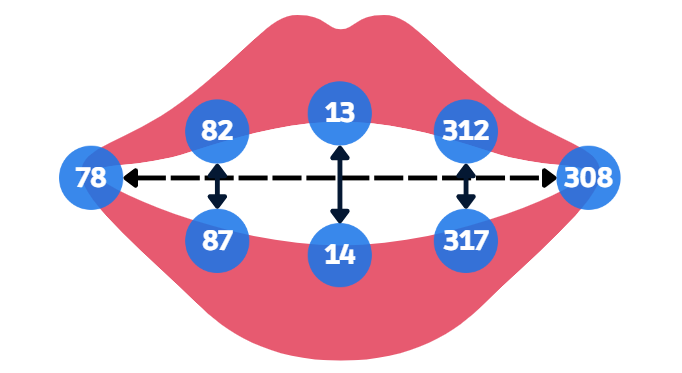

opencv-python: biblioteca de visão computacional.

dlib: biblioteca de aprendizado de máquina e visão computacional.

numpy: biblioteca de álgebra linear e manipulação de arrays.

sounddevice: biblioteca para reprodução e gravação de áudio.

scipy: biblioteca para computação científica.

In [ ]:
pip install opencv-python

In [ ]:
pip install opencv-python dlib numpy sounddevice scipy



In [ ]:
import cv2
import dlib
import numpy as np

from scipy.io.wavfile import read

# Carregar o detector de face e o preditor de pontos faciais
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor

# Função para calcular a razão da abertura da boca (MAR)
def mouth_aspect_ratio(mouth):
    A = np.linalg.norm(mouth[2] - mouth[10])
    B = np.linalg.norm(mouth[4] - mouth[8])
    return A / B

# Função para calcular a razão de piscada dos olhos (EAR)
def eye_aspect_ratio(eye):
    A = np.linalg.norm(eye[1] - eye[5])
    B = np.linalg.norm(eye[2] - eye[4])
    C = np.linalg.norm(eye[0] - eye[3])
    return (A + B) / (2.0 * C)

cap = cv2.VideoCapture(0)

# Função para tocar o som
def play_bird_song():
    sd.play(bird_song, rate)

# Função para alterar a cor do rosto no vídeo
def apply_color_effects(frame, color='blue'):
    if color == 'blue':
        frame[:, :] = [255, 0, 0]  # Blue filter
    elif color == 'green':
        frame[:, :] = [0, 255, 0]  # Green filter
    elif color == 'red':
        frame[:, :] = [0, 0, 255]  # Red filter
    return frame

# Iniciar a captura de vídeo
cap = cv2.VideoCapture(0)

while True:
    # Capturar o frame da webcam
    ret, frame = cap.read()
    if not ret:
        break

    # Converter para escala de cinza
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detectar faces no frame
    faces = detector(gray)

    for face in faces:
        # Detectar pontos faciais
        landmarks = predictor(gray, face)

        # Obter os pontos da boca (48-60)
        mouth = []
        for i in range(48, 61):
            mouth.append((landmarks.part(i).x, landmarks.part(i).y))
        mouth = np.array(mouth, dtype=np.int32)

        # Obter os pontos dos olhos (36-41 e 42-47)
        left_eye = []
        right_eye = []
        for i in range(36, 42):
            left_eye.append((landmarks.part(i).x, landmarks.part(i).y))
        for i in range(42, 48):
            right_eye.append((landmarks.part(i).x, landmarks.part(i).y))
        left_eye = np.array(left_eye, dtype=np.int32)
        right_eye = np.array(right_eye, dtype=np.int32)

        # Calcular o MAR (Mouth Aspect Ratio) para a boca
        mar = mouth_aspect_ratio(mouth)

        # Calcular o EAR (Eye Aspect Ratio) para os olhos (piscada)
        ear_left = eye_aspect_ratio(left_eye)
        ear_right = eye_aspect_ratio(right_eye)
        ear = (ear_left + ear_right) / 2.0

        # Detectar boca aberta
        if mar > 0.5:
            # Tocar o som dos passarinhos
            play_bird_song()
            # Alterar a cor do rosto (efeito visual)
            frame = apply_color_effects(frame, color='blue')  # Mudar a cor do rosto para azul

        # Detectar piscada (EAR abaixo de 0.2)
        if ear < 0.2:
            cv2.putText(frame, "Piscada Detectada!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Desenhar a boca no vídeo
        cv2.polylines(frame, [mouth], isClosed=True, color=(0, 255, 0), thickness=2)

        # Desenhar os olhos no vídeo
        cv2.polylines(frame, [left_eye], isClosed=True, color=(0, 255, 255), thickness=2)
        cv2.polylines(frame, [right_eye], isClosed=True, color=(0, 255, 255), thickness=2)








Sons de Pássaros:
Vários Tipos Sons

Baixar arquivos WAV gratuitos nesse site

    freesound.org
    

https://freesound.org/

https://freesound.org/people/JanjaBoy/sounds/702478/